In [6]:
import polars as pl
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [7]:
flight_data = pl.scan_csv("flights.csv")
airport_data = pl.scan_csv("airports.csv")
airline_data = pl.scan_csv("airlines.csv")

### Exploratory Data Analysis

In [5]:
airport_data.collect()[:50]

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
str,str,str,str,str,f64,f64
"""ABE""","""Lehigh Valley …","""Allentown""","""PA""","""USA""",40.65236,-75.4404
"""ABI""","""Abilene Region…","""Abilene""","""TX""","""USA""",32.41132,-99.6819
"""ABQ""","""Albuquerque In…","""Albuquerque""","""NM""","""USA""",35.04022,-106.60919
"""ABR""","""Aberdeen Regio…","""Aberdeen""","""SD""","""USA""",45.44906,-98.42183
"""ABY""","""Southwest Geor…","""Albany""","""GA""","""USA""",31.53552,-84.19447
"""ACK""","""Nantucket Memo…","""Nantucket""","""MA""","""USA""",41.25305,-70.06018
"""ACT""","""Waco Regional …","""Waco""","""TX""","""USA""",31.61129,-97.23052
"""ACV""","""Arcata Airport…","""Arcata/Eureka""","""CA""","""USA""",40.97812,-124.10862
"""ACY""","""Atlantic City …","""Atlantic City""","""NJ""","""USA""",39.45758,-74.57717


In [3]:
airline_data.collect()

IATA_CODE,AIRLINE
str,str
"""UA""","""United Air Lin…"
"""AA""","""American Airli…"
"""US""","""US Airways Inc…"
"""F9""","""Frontier Airli…"
"""B6""","""JetBlue Airway…"
"""OO""","""Skywest Airlin…"
"""AS""","""Alaska Airline…"
"""NK""","""Spirit Air Lin…"
"""WN""","""Southwest Airl…"


In [5]:
flight_data.collect().head()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null


In [7]:
flight_data.schema

OrderedDict([('YEAR', Int64),
             ('MONTH', Int64),
             ('DAY', Int64),
             ('DAY_OF_WEEK', Int64),
             ('AIRLINE', String),
             ('FLIGHT_NUMBER', Int64),
             ('TAIL_NUMBER', String),
             ('ORIGIN_AIRPORT', String),
             ('DESTINATION_AIRPORT', String),
             ('SCHEDULED_DEPARTURE', Int64),
             ('DEPARTURE_TIME', Int64),
             ('DEPARTURE_DELAY', Int64),
             ('TAXI_OUT', Int64),
             ('WHEELS_OFF', Int64),
             ('SCHEDULED_TIME', Int64),
             ('ELAPSED_TIME', Int64),
             ('AIR_TIME', Int64),
             ('DISTANCE', Int64),
             ('WHEELS_ON', Int64),
             ('TAXI_IN', Int64),
             ('SCHEDULED_ARRIVAL', Int64),
             ('ARRIVAL_TIME', Int64),
             ('ARRIVAL_DELAY', Int64),
             ('DIVERTED', Int64),
             ('CANCELLED', Int64),
             ('CANCELLATION_REASON', String),
             ('AIR_SYSTEM_DELA

In [8]:
flight_df = flight_data.collect()

In [51]:
flight_df.null_count().to_numpy().reshape(-1)

array([      0,       0,       0,       0,       0,       0,   14721,
             0,       0,       0,   86153,   86153,   89047,   89047,
             6,  105071,  105071,       0,   92513,   92513,       0,
         92513,  105071,       0,       0, 5729195, 4755640, 4755640,
       4755640, 4755640, 4755640], dtype=uint32)

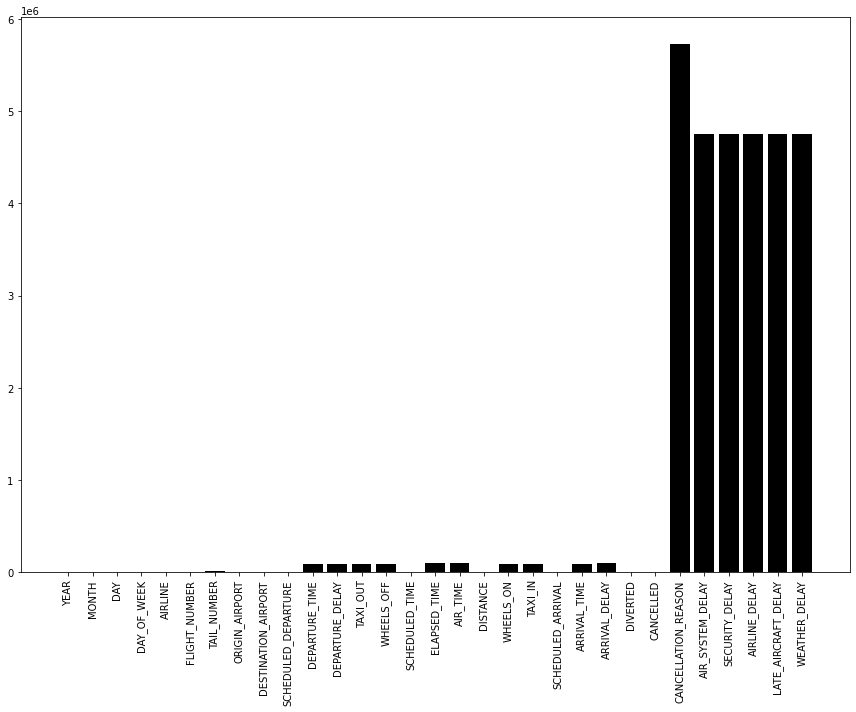

In [100]:
plt.figure(figsize=(12,10))

plt.bar([col for col in flight_df.columns],flight_df.null_count().to_numpy().reshape(-1),color='k')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [83]:
np.round(flight_df.null_count().select((pl.col('*')/5819079) *100).to_numpy(),2)

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.25,  0.  ,  0.  ,
         0.  ,  1.48,  1.48,  1.53,  1.53,  0.  ,  1.81,  1.81,  0.  ,
         1.59,  1.59,  0.  ,  1.59,  1.81,  0.  ,  0.  , 98.46, 81.72,
        81.72, 81.72, 81.72, 81.72]])

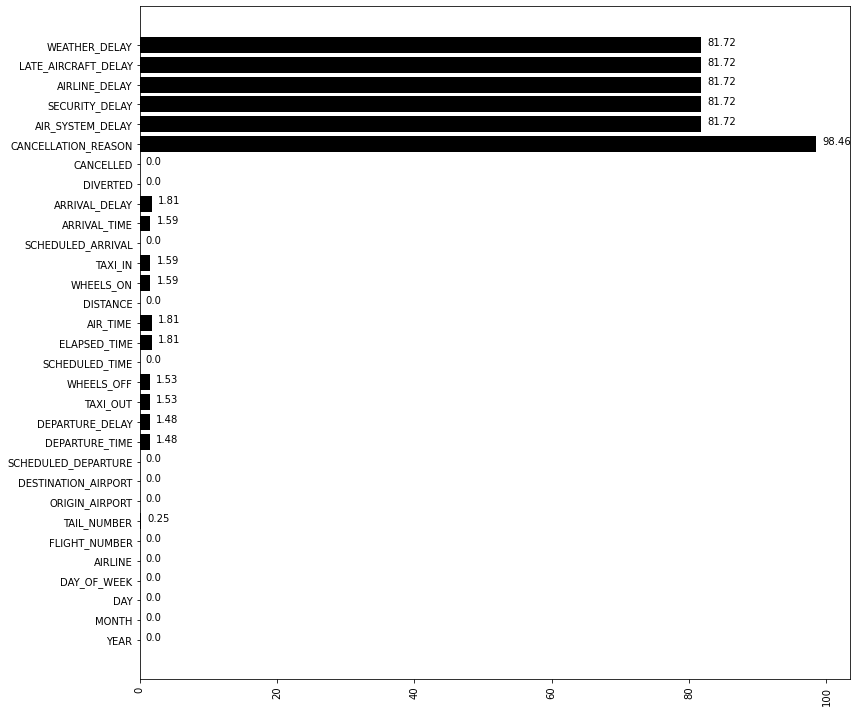

In [109]:
plt.figure(figsize=(12,10))

plt.barh([col for col in flight_df.columns],flight_df.null_count().select((pl.col('*')/5819079) *100).to_numpy().reshape(-1),color='k')
plt.xticks(rotation=90)
plt.tight_layout()

# Add labels to the bars
for i, value in enumerate(np.round(flight_df.null_count().select((pl.col('*')/5819079) *100).to_numpy(),2).reshape(-1)):
    plt.text(value+0.9, i, str(value), rotation=0)

plt.show()

In [7]:
columns_high_null = ['WEATHER_DELAY','LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','SECURITY_DELAY','AIR_SYSTEM_DELAY','CANCELLATION_REASON']

flight_df_ = flight_df.with_columns(pl.col(columns_high_null).fill_null(0))

NaN columns are filled with 0, they were not dropped cause the NaN values are Missing at Random, meaning their missing values were due to the fact another feature was present or absent

In [140]:
flight_df['CANCELLED'].value_counts()

CANCELLED,count
i64,u32
1,89884
0,5729195


In [143]:
for col in flight_df_.columns:
    print(f'{col} unique values: {flight_df_.select(pl.col(col)).unique(maintain_order=True)}')

YEAR unique values: shape: (1, 1)
┌──────┐
│ YEAR │
│ ---  │
│ i64  │
╞══════╡
│ 2015 │
└──────┘
MONTH unique values: shape: (12, 1)
┌───────┐
│ MONTH │
│ ---   │
│ i64   │
╞═══════╡
│ 1     │
│ 2     │
│ 3     │
│ 4     │
│ …     │
│ 9     │
│ 10    │
│ 11    │
│ 12    │
└───────┘
DAY unique values: shape: (31, 1)
┌─────┐
│ DAY │
│ --- │
│ i64 │
╞═════╡
│ 1   │
│ 2   │
│ 3   │
│ 4   │
│ …   │
│ 28  │
│ 29  │
│ 30  │
│ 31  │
└─────┘
DAY_OF_WEEK unique values: shape: (7, 1)
┌─────────────┐
│ DAY_OF_WEEK │
│ ---         │
│ i64         │
╞═════════════╡
│ 4           │
│ 5           │
│ 6           │
│ 7           │
│ 1           │
│ 2           │
│ 3           │
└─────────────┘
AIRLINE unique values: shape: (14, 1)
┌─────────┐
│ AIRLINE │
│ ---     │
│ str     │
╞═════════╡
│ AS      │
│ AA      │
│ US      │
│ DL      │
│ …       │
│ MQ      │
│ F9      │
│ WN      │
│ VX      │
└─────────┘
FLIGHT_NUMBER unique values: shape: (6_952, 1)
┌───────────────┐
│ FLIGHT_NUMBER │
│ ---        

In [4]:
flight_df_ = flight_df

In [5]:
cols = flight_df_.columns
numerical_cols = [col for col in cols if flight_df_[col].dtype in [pl.Float64, pl.Int64]]
categorical_cols = [col for col in cols if flight_df_[col].dtype in [pl.String]]

In [147]:
# print(airline_data.schema)
# print(airport_data.schema)

# airline_airport = airport_data.collect().join(airline_data.collect(),on='IATA_CODE',how='left')
# airport_data.collect()
# airline_airport

# df_missing = (
#     airport_data.collect()
#     .filter(
#         pl.any_horizontal(pl.all().is_null())
#     )
# )

# columns_with_null = [col for col in df.columns if flight_df[col].null_count() > 0]
# flight_df.select(pl.col(columns_with_null))

OrderedDict([('IATA_CODE', String), ('AIRLINE', String)])
OrderedDict([('IATA_CODE', String), ('AIRPORT', String), ('CITY', String), ('STATE', String), ('COUNTRY', String), ('LATITUDE', Float64), ('LONGITUDE', Float64)])


In [54]:
#UNiVARIATE ANALYSIS

flight_df_[numerical_cols].describe()

describe,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",2015.0,6.524085,15.704594,3.926941,2173.092742,1329.60247,1315.436385,9.231431,15.825724,1336.402608,141.685745,134.532365,111.462029,822.356495,1448.074877,7.316768,1493.808249,1453.017606,4.327482,0.00261,0.015446,2.463579,0.013917,3.466692,4.28967,0.53277
"""std""",0.0,3.405137,8.783425,1.988845,1757.063999,483.751821,518.450696,36.822816,9.045025,521.510113,75.210681,75.767087,73.154215,607.784287,549.746305,5.670329,507.164696,553.81946,38.919559,0.05102,0.12332,13.055845,0.916786,21.854996,20.574213,8.807465
"""min""",2015.0,1.0,1.0,1.0,1.0,1.0,0.0,-82.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,1.0,0.0,-87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",2015.0,4.0,8.0,2.0,730.0,917.0,908.0,-5.0,11.0,924.0,85.0,81.0,59.0,373.0,1042.0,4.0,1110.0,1046.0,-13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""50%""",2015.0,7.0,16.0,4.0,1690.0,1325.0,1323.0,-1.0,14.0,1335.0,123.0,117.0,93.0,647.0,1500.0,6.0,1520.0,1504.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""75%""",2015.0,9.0,23.0,6.0,3230.0,1730.0,1736.0,7.0,19.0,1750.0,173.0,167.0,143.0,1062.0,1908.0,9.0,1918.0,1913.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""max""",2015.0,12.0,31.0,7.0,9855.0,2359.0,2400.0,1988.0,225.0,2400.0,718.0,766.0,690.0,4983.0,2400.0,248.0,2400.0,2400.0,1971.0,1.0,1.0,1134.0,573.0,1971.0,1331.0,1211.0


Note: Only one Year in data, we won't be able to gain insights from that
      Month range from 1-12, all months accounted for
      Days range from 1 -31, 
      Time columns will be converted to time 

In [118]:
flight_df_.null_count()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,14721,0,0,0,86153,86153,89047,89047,6,105071,105071,0,92513,92513,0,92513,105071,0,0,0,0,0,0,0,0


In [56]:
cols

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [6]:
#dealing with columns that measure time(casting to right format)

TIME_COLUMNS = ['SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
                'ELAPSED_TIME','AIR_TIME','DISTANCE','WHEELS_ON','TAXI_IN','SCHEDULED_ARRIVAL','ARRIVAL_TIME',
                'ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']

In [142]:
x='1234'
x[:2]

'12'

In [7]:
from datetime import datetime

def time(x):
    if len(x) ==4 :
        hours = x[:2]
        minutes = x[2:]
    elif 2 < len(x) < 4:
        hours = x[:2]
        minutes = '0'+ x[2:]
    else:
        if int(x) < 10:
            minutes = '0'+ x
        else:
            minutes = x
        hours = '00'
    if abs(int(hours)) >= 24:
        hours = str(int(hours) - 24)                      
    return hours

def zero_pad(x,N):
    return x.ljust(N,'0')

def time_casting(data,cols):
    df_ = data.clone()
    for col in cols:
#         df_=df_.select(pl.col(col).cast(pl.String).map_elements(lambda x:)
        df_ = df_.select(pl.col(col).cast(pl.String).map_elements(lambda x: time(x)))
    return df_      

In [444]:
TIME_COLUMNS

['SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [8]:
result_df = flight_df_.with_columns(time_casting(flight_df_,['SCHEDULED_DEPARTURE']))
result_df = result_df.with_columns(time_casting(result_df,['DEPARTURE_TIME']))

In [424]:
result_df

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,str,i64,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""","""00""","""23""",-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,"""0""",0,0,0,0,0
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""","""00""","""00""",-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,"""0""",0,0,0,0,0
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""","""00""","""00""",-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,"""0""",0,0,0,0,0
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""","""00""","""00""",-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,"""0""",0,0,0,0,0
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""","""00""","""00""",-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,"""0""",0,0,0,0,0
2015,1,1,4,"""DL""",806,"""N3730B""","""SFO""","""MSP""","""00""","""00""",-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,"""0""",0,0,0,0,0
2015,1,1,4,"""NK""",612,"""N635NK""","""LAS""","""MSP""","""00""","""00""",-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,"""0""",0,0,0,0,0
2015,1,1,4,"""US""",2013,"""N584UW""","""LAX""","""CLT""","""00""","""00""",14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,"""0""",0,0,0,0,0
2015,1,1,4,"""AA""",1112,"""N3LAAA""","""SFO""","""DFW""","""00""","""00""",-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,"""0""",0,0,0,0,0


In [11]:
airport_data.collect()

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
str,str,str,str,str,f64,f64
"""ABE""","""Lehigh Valley …","""Allentown""","""PA""","""USA""",40.65236,-75.4404
"""ABI""","""Abilene Region…","""Abilene""","""TX""","""USA""",32.41132,-99.6819
"""ABQ""","""Albuquerque In…","""Albuquerque""","""NM""","""USA""",35.04022,-106.60919
"""ABR""","""Aberdeen Regio…","""Aberdeen""","""SD""","""USA""",45.44906,-98.42183
"""ABY""","""Southwest Geor…","""Albany""","""GA""","""USA""",31.53552,-84.19447
"""ACK""","""Nantucket Memo…","""Nantucket""","""MA""","""USA""",41.25305,-70.06018
"""ACT""","""Waco Regional …","""Waco""","""TX""","""USA""",31.61129,-97.23052
"""ACV""","""Arcata Airport…","""Arcata/Eureka""","""CA""","""USA""",40.97812,-124.10862
"""ACY""","""Atlantic City …","""Atlantic City""","""NJ""","""USA""",39.45758,-74.57717


In [9]:
result_df_ = result_df.join(airport_data.collect(),how='left',left_on='ORIGIN_AIRPORT',right_on='IATA_CODE')
result_df_

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
i64,i64,i64,i64,str,i64,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,str,str,str,str,f64,f64
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""","""00""","""23""",-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null,"""Ted Stevens An…","""Anchorage""","""AK""","""USA""",61.17432,-149.99619
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""","""00""","""00""",-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""","""00""","""00""",-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""","""00""","""00""",-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""","""00""","""00""",-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null,"""Seattle-Tacoma…","""Seattle""","""WA""","""USA""",47.44898,-122.30931
2015,1,1,4,"""DL""",806,"""N3730B""","""SFO""","""MSP""","""00""","""00""",-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,null,null,null,null,null,null,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484
2015,1,1,4,"""NK""",612,"""N635NK""","""LAS""","""MSP""","""00""","""00""",-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,null,null,null,null,null,null,"""McCarran Inter…","""Las Vegas""","""NV""","""USA""",36.08036,-115.15233
2015,1,1,4,"""US""",2013,"""N584UW""","""LAX""","""CLT""","""00""","""00""",14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,null,null,null,null,null,null,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807
2015,1,1,4,"""AA""",1112,"""N3LAAA""","""SFO""","""DFW""","""00""","""00""",-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,null,null,null,null,null,null,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484


In [10]:
# import polars as pl

# # Sample DataFrame
# data = {'YEAR': [2022, 2022, 2023],
#         'MONTH': [1, 2, 3],
#         'DAY': [10, 15, 20]}

# result_ = pl.DataFrame(data)

# # Concatenate columns 'YEAR', 'MONTH', and 'DAY' into a new column 'Date'
# result_ = result_.with_columns(
#     Date=result_['YEAR'].cast(pl.String) + '-' +
#          result_['MONTH'].cast(pl.String) + '-' +
#          result_['DAY'].cast(pl.String)
# )

# print(result_)


In [10]:
result_df_1 = result_df_.with_columns(Date=result_df['YEAR']+'-'+result_df['MONTH']+'-'+result_df['DAY'])
result_df_1

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Date
i64,i64,i64,i64,str,i64,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,str,str,str,str,f64,f64,str
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""","""00""","""23""",-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null,"""Ted Stevens An…","""Anchorage""","""AK""","""USA""",61.17432,-149.99619,"""2015-1-1"""
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""","""00""","""00""",-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,"""2015-1-1"""
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""","""00""","""00""",-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,"""2015-1-1"""
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""","""00""","""00""",-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,"""2015-1-1"""
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""","""00""","""00""",-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null,"""Seattle-Tacoma…","""Seattle""","""WA""","""USA""",47.44898,-122.30931,"""2015-1-1"""
2015,1,1,4,"""DL""",806,"""N3730B""","""SFO""","""MSP""","""00""","""00""",-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,null,null,null,null,null,null,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,"""2015-1-1"""
2015,1,1,4,"""NK""",612,"""N635NK""","""LAS""","""MSP""","""00""","""00""",-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,null,null,null,null,null,null,"""McCarran Inter…","""Las Vegas""","""NV""","""USA""",36.08036,-115.15233,"""2015-1-1"""
2015,1,1,4,"""US""",2013,"""N584UW""","""LAX""","""CLT""","""00""","""00""",14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,null,null,null,null,null,null,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,"""2015-1-1"""
2015,1,1,4,"""AA""",1112,"""N3LAAA""","""SFO""","""DFW""","""00""","""00""",-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,null,null,null,null,null,null,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,"""2015-1-1"""


In [11]:
result_df_2 = result_df_1.with_columns(pl.col("Date").str.to_date("%Y-%m-%d"))
result_df_2

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Date
i64,i64,i64,i64,str,i64,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,str,str,str,str,f64,f64,date
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""","""00""","""23""",-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null,"""Ted Stevens An…","""Anchorage""","""AK""","""USA""",61.17432,-149.99619,2015-01-01
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""","""00""","""00""",-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""","""00""","""00""",-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""","""00""","""00""",-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""","""00""","""00""",-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null,"""Seattle-Tacoma…","""Seattle""","""WA""","""USA""",47.44898,-122.30931,2015-01-01
2015,1,1,4,"""DL""",806,"""N3730B""","""SFO""","""MSP""","""00""","""00""",-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,null,null,null,null,null,null,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01
2015,1,1,4,"""NK""",612,"""N635NK""","""LAS""","""MSP""","""00""","""00""",-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,null,null,null,null,null,null,"""McCarran Inter…","""Las Vegas""","""NV""","""USA""",36.08036,-115.15233,2015-01-01
2015,1,1,4,"""US""",2013,"""N584UW""","""LAX""","""CLT""","""00""","""00""",14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,null,null,null,null,null,null,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01
2015,1,1,4,"""AA""",1112,"""N3LAAA""","""SFO""","""DFW""","""00""","""00""",-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,null,null,null,null,null,null,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01


## Univariate Analysis 

In [12]:
data = result_df_2

In [13]:
numerical_cols.append('LATITUDE')
numerical_cols.append('LONGITUDE')

In [151]:
result_df['ORIGIN_AIRPORT'].value_counts()

ORIGIN_AIRPORT,count
str,u32
"""VPS""",4868
"""TUS""",15117
"""BMI""",2730
"""HOU""",52042
"""EGE""",1241
"""14814""",556
"""10561""",183
"""ILG""",100
"""GPT""",3605


In [32]:
data[numerical_cols].describe()

describe,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,LATITUDE,LONGITUDE
str,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,"""5819079""","""5819079""",5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.819079e6,5.328309e6,5.328309e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,490770.0,490770.0
"""mean""",2015.0,6.524085,15.704594,3.926941,2173.092742,null,null,9.231431,15.825724,1336.402608,141.685745,134.532365,111.462029,822.356495,1448.074877,7.316768,1493.808249,1453.017606,4.327482,0.00261,0.015446,2.463579,0.013917,3.466692,4.28967,0.53277,36.638064,-95.491233
"""std""",0.0,3.405137,8.783425,1.988845,1757.063999,null,null,36.822816,9.045025,521.510113,75.210681,75.767087,73.154215,607.784287,549.746305,5.670329,507.164696,553.81946,38.919559,0.05102,0.12332,13.055845,0.916786,21.854996,20.574213,8.807465,5.999338,18.156368
"""min""",2015.0,1.0,1.0,1.0,1.0,null,null,-82.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,1.0,0.0,-87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.48345,-176.64603
"""25%""",2015.0,4.0,8.0,2.0,730.0,null,null,-5.0,11.0,924.0,85.0,81.0,59.0,373.0,1042.0,4.0,1110.0,1046.0,-13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.89595,-111.97777
"""50%""",2015.0,7.0,16.0,4.0,1690.0,null,null,-1.0,14.0,1335.0,123.0,117.0,93.0,647.0,1500.0,6.0,1520.0,1504.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.36186,-90.25803
"""75%""",2015.0,9.0,23.0,6.0,3230.0,null,null,7.0,19.0,1750.0,173.0,167.0,143.0,1062.0,1908.0,9.0,1918.0,1913.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.78839,-81.68786
"""max""",2015.0,12.0,31.0,7.0,9855.0,null,null,1988.0,225.0,2400.0,718.0,766.0,690.0,4983.0,2400.0,248.0,2400.0,2400.0,1971.0,1.0,1.0,1134.0,573.0,1971.0,1331.0,1211.0,71.28545,-64.79856


<AxesSubplot:ylabel='Count'>

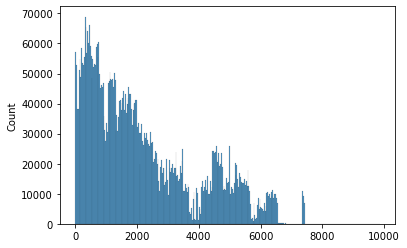

In [40]:
sns.histplot(data["FLIGHT_NUMBER"].to_numpy())

distribution is right skewed

<AxesSubplot:ylabel='Count'>

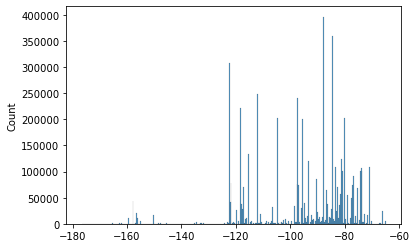

In [33]:
sns.histplot(data["LONGITUDE"].to_numpy())

<AxesSubplot:ylabel='Count'>

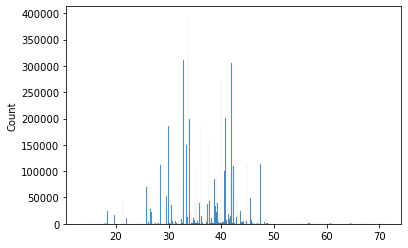

In [34]:
sns.histplot(data["LATITUDE"].to_numpy())

<AxesSubplot:ylabel='Count'>

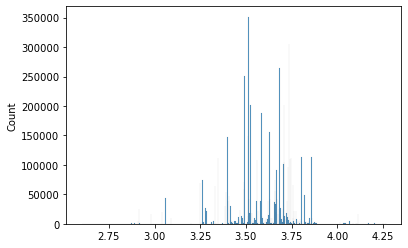

In [36]:
sns.histplot(np.log(data["LATITUDE"].to_numpy()))

In [39]:
data['COUNTRY'].value_counts()

COUNTRY,count
str,u32
null,486165
"""USA""",5332914


This was a USA data, null columns are for those not in USA

In [14]:
data_ = data.with_columns(pl.col('COUNTRY').fill_null("NOT_USA"))

In [153]:
data_['COUNTRY'].value_counts()

COUNTRY,count
str,u32
"""NOT_USA""",486165
"""USA""",5332914


In [54]:
data_['STATE'].value_counts(sort=True)

STATE,count
str,u32
"""CA""",647911
"""TX""",631124
null,486165
"""FL""",415586
"""IL""",381644
"""GA""",360496
"""NY""",246235
"""CO""",215451
"""AZ""",165469


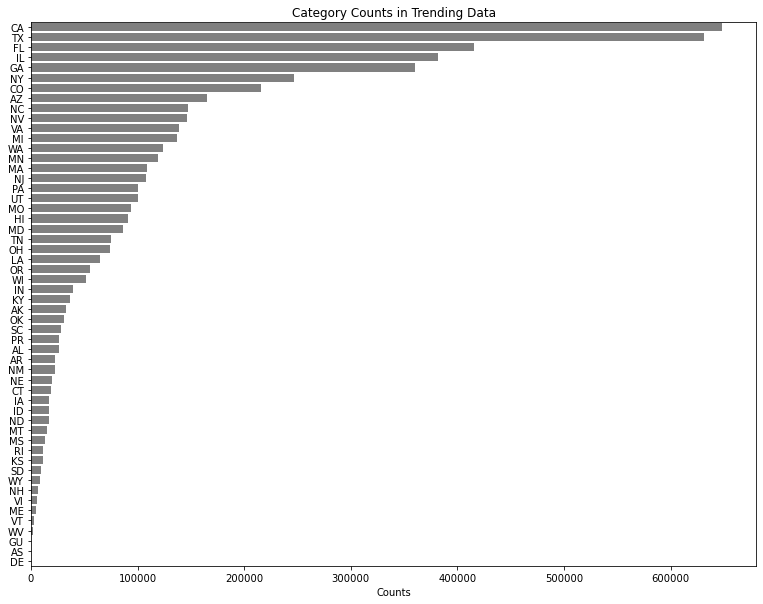

In [55]:
plt.figure(figsize=(13,10))

sns.barplot(y=data_['STATE'].value_counts(sort=True)['STATE'].to_numpy(),x=data_['STATE'].value_counts(sort=True)['count'].to_numpy(),color="grey")

plt.title("Category Counts in Trending Data")
plt.xlabel("Counts")
plt.show()

In [33]:
#categorical lookup
categorical_cols

['AIRLINE',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'CANCELLATION_REASON']

In [30]:
airline_categories = data['AIRLINE'].value_counts(sort=True)
airline_categories

AIRLINE,count
str,u32
"""WN""",1261855
"""DL""",875881
"""AA""",725984
"""OO""",588353
"""EV""",571977
"""UA""",515723
"""MQ""",294632
"""B6""",267048
"""US""",198715


In [29]:
data['AIRLINE'].value_counts().sort(by='count').plot()

:Curve   [index]   (AIRLINE)

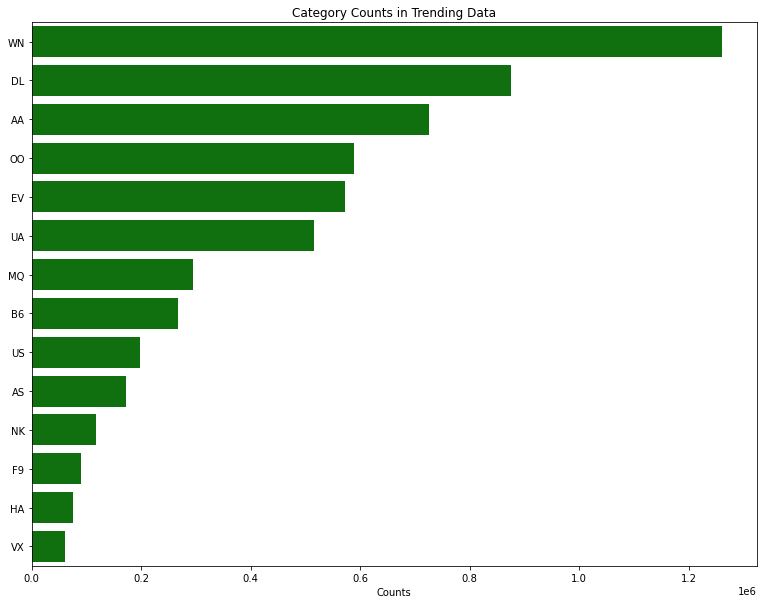

In [36]:
plt.figure(figsize=(13,10))

sns.barplot(y=airline_categories['AIRLINE'].to_numpy(),x=airline_categories['count'].to_numpy(),color="green")

plt.title("Category Counts in Trending Data")
plt.xlabel("Counts")
plt.show()

the airline WN is in majority in this dataset

In [58]:
numerical_cols

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'FLIGHT_NUMBER',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY',
 'LATITUDE',
 'LONGITUDE']

In [61]:
for col in TIME_COLUMNS:
    numerical_cols.remove(col)

In [62]:
numerical_cols

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'FLIGHT_NUMBER',
 'DIVERTED',
 'CANCELLED',
 'LATITUDE',
 'LONGITUDE']

In [68]:
#outliers

def outliers(df,cols):
    
    for col in cols:
        plt.figure()
        sns.boxplot(df[col].to_numpy())
        plt.title(col)

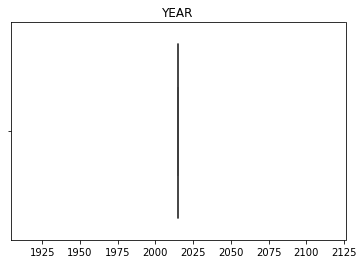

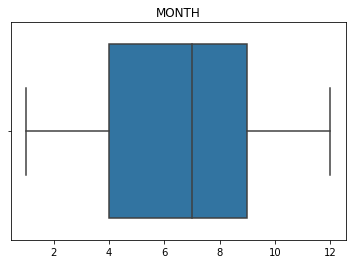

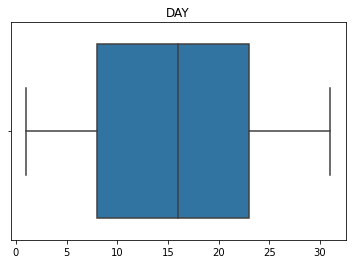

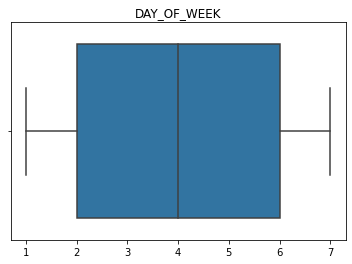

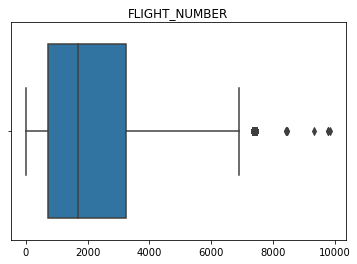

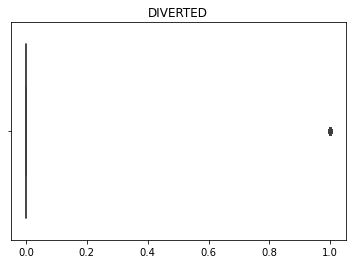

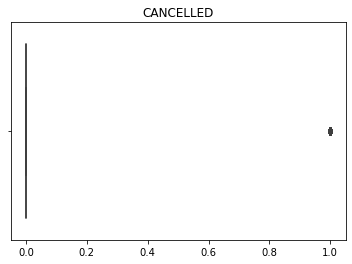

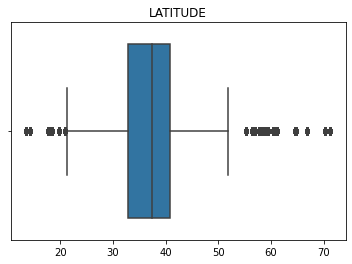

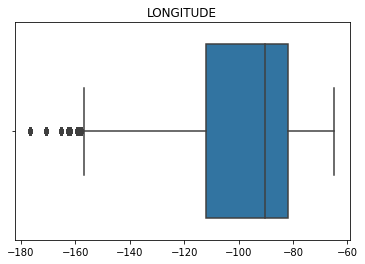

In [69]:
outliers(data_,numerical_cols)

## Bivariate Analysis 

In [23]:
airline_groupby = data_.groupby('AIRLINE').agg(pl.count(),(pl.count()/pl.col('CANCELLED').sum()).alias('flights/cancelled')).sort(by='flights/cancelled')
airline_groupby

AIRLINE,count,flights/cancelled
str,u32,f64
"""MQ""",294632,19.609451
"""EV""",571977,37.553476
"""US""",198715,48.860339
"""NK""",117379,58.572355
"""OO""",588353,59.071586
"""B6""",267048,62.45276
"""AA""",725984,66.48814
"""UA""",515723,78.460825
"""WN""",1261855,78.654553


In [40]:
airline_groupby_ = data_.groupby('AIRLINE').agg(pl.count(),(pl.count()/pl.col('CANCELLED').sum()).alias('flights/cancelled')).sort(by='count')
airline_groupby_

AIRLINE,count,flights/cancelled
str,u32,f64
"""VX""",61903,115.923221
"""HA""",76272,446.035088
"""F9""",90836,154.482993
"""NK""",117379,58.572355
"""AS""",172521,257.878924
"""US""",198715,48.860339
"""B6""",267048,62.45276
"""MQ""",294632,19.609451
"""UA""",515723,78.460825


Text(0.04, 0.5, 'flights per cancellation')

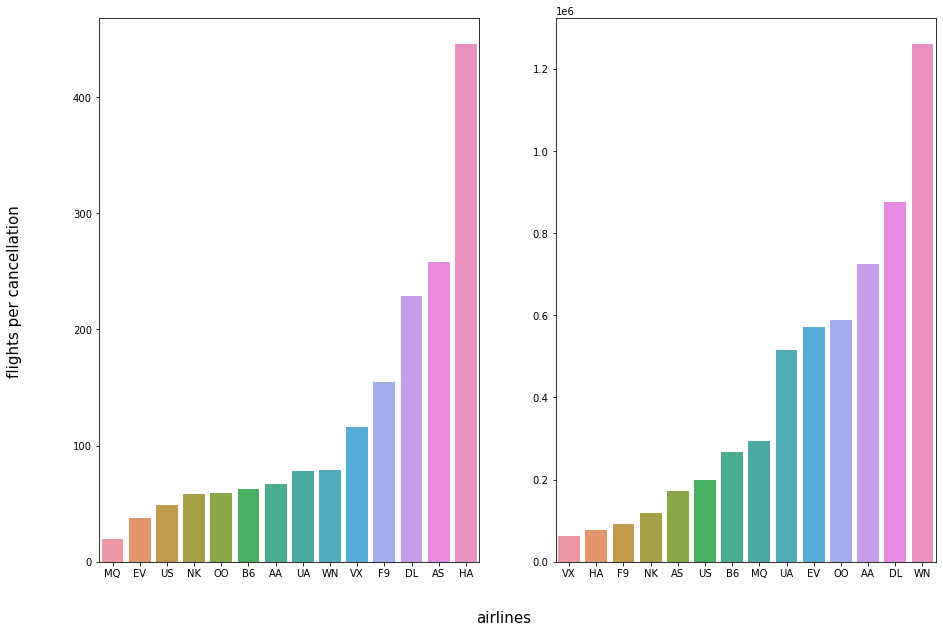

In [48]:
fig,ax= plt.subplots(1,2,figsize=(15,10))
sns.barplot(x=airline_groupby['AIRLINE'].to_numpy(),y=airline_groupby['flights/cancelled'],ax=ax[0])
sns.barplot(x=airline_groupby_['AIRLINE'].to_numpy(),y=airline_groupby_['count'],ax=ax[1])
fig.text(0.5, 0.04, 'airlines', ha='center',fontsize=15)
fig.text(0.04, 0.5, 'flights per cancellation', va='center', rotation='vertical',fontsize=15)

From analysis we can get insights that the Airline HA produces the best number of flights per cancellation, and we could advice people to board more HA airlines to avoid cancelled flights

In [59]:
cancellation_reason = data_['CANCELLATION_REASON'].value_counts()
cancellation_reason

CANCELLATION_REASON,count
str,u32
"""0""",5729195
"""B""",48851
"""A""",25262
"""D""",22
"""C""",15749


In [64]:
cancellation_reason= cancellation_reason.filter(pl.col('CANCELLATION_REASON')!='0').sort(by='count')

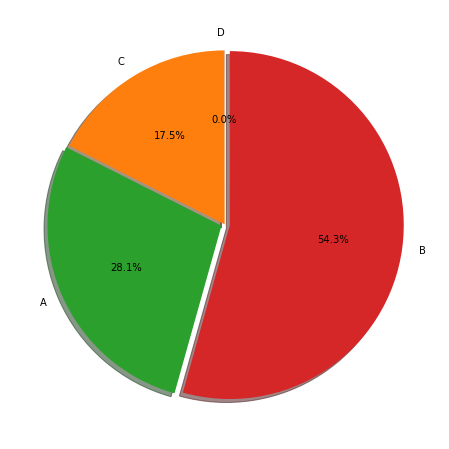

In [88]:
plt.figure(figsize=(10,8))
plt.pie(cancellation_reason['count'].to_numpy(),labels=cancellation_reason['CANCELLATION_REASON'].to_numpy(),
        explode=(0,0,0.02,0.03),autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

Reason B seems to be the most reason for cancelled flights, whatever the reason, it is important the airline operators work on it

In [15]:
data_1 = data_.with_columns(ROUTE = pl.col('ORIGIN_AIRPORT')+'_'+pl.col('DESTINATION_AIRPORT'))
data_1

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Date,ROUTE
i64,i64,i64,i64,str,i64,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,str,str,str,str,f64,f64,date,str
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""","""00""","""23""",-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null,"""Ted Stevens An…","""Anchorage""","""AK""","""USA""",61.17432,-149.99619,2015-01-01,"""ANC_SEA"""
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""","""00""","""00""",-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_PBI"""
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""","""00""","""00""",-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_CLT"""
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""","""00""","""00""",-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_MIA"""
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""","""00""","""00""",-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null,"""Seattle-Tacoma…","""Seattle""","""WA""","""USA""",47.44898,-122.30931,2015-01-01,"""SEA_ANC"""
2015,1,1,4,"""DL""",806,"""N3730B""","""SFO""","""MSP""","""00""","""00""",-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,null,null,null,null,null,null,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_MSP"""
2015,1,1,4,"""NK""",612,"""N635NK""","""LAS""","""MSP""","""00""","""00""",-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,null,null,null,null,null,null,"""McCarran Inter…","""Las Vegas""","""NV""","""USA""",36.08036,-115.15233,2015-01-01,"""LAS_MSP"""
2015,1,1,4,"""US""",2013,"""N584UW""","""LAX""","""CLT""","""00""","""00""",14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,null,null,null,null,null,null,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_CLT"""
2015,1,1,4,"""AA""",1112,"""N3LAAA""","""SFO""","""DFW""","""00""","""00""",-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,null,null,null,null,null,null,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_DFW"""


In [113]:
data_1['ROUTE'].value_counts(sort=True).filter(pl.col('count')>1000)

ROUTE,count
str,u32
"""SFO_LAX""",13744
"""LAX_SFO""",13457
"""JFK_LAX""",12016
"""LAX_JFK""",12015
"""LAS_LAX""",9715
"""LGA_ORD""",9639
"""LAX_LAS""",9594
"""ORD_LGA""",9575
"""SFO_JFK""",8440


In [16]:
popular_routes = data_1[['CANCELLED','ROUTE']].join(data_1['ROUTE'].value_counts(sort=True).filter(pl.col('count')>5000),how='left',on='ROUTE').drop_nulls()
popular_routes

CANCELLED,ROUTE,count
i64,str,u32
0,"""ANC_SEA""",6383
0,"""SEA_ANC""",6382
0,"""DEN_ATL""",5082
0,"""ANC_SEA""",6383
0,"""ANC_SEA""",6383
1,"""ANC_SEA""",6383
0,"""ANC_SEA""",6383
0,"""ANC_SEA""",6383
0,"""HNL_KOA""",6390


In [17]:
popular_routes_ = popular_routes.groupby('ROUTE').agg((pl.col('CANCELLED').sum()/pl.count('ROUTE')).alias('count/cancel'),pl.count()).sort(by='count/cancel',descending=True)
popular_routes_

ROUTE,count/cancel,count
str,f64,u32
"""BOS_LGA""",0.06243,7096
"""LGA_BOS""",0.062113,7100
"""LGA_ORD""",0.045129,9639
"""ORD_LGA""",0.042611,9575
"""LAX_OAK""",0.036101,6288
"""OAK_LAX""",0.035982,6281
"""DCA_BOS""",0.035259,7686
"""BOS_DCA""",0.034604,7687
"""HOU_DAL""",0.034466,6296


<AxesSubplot:>

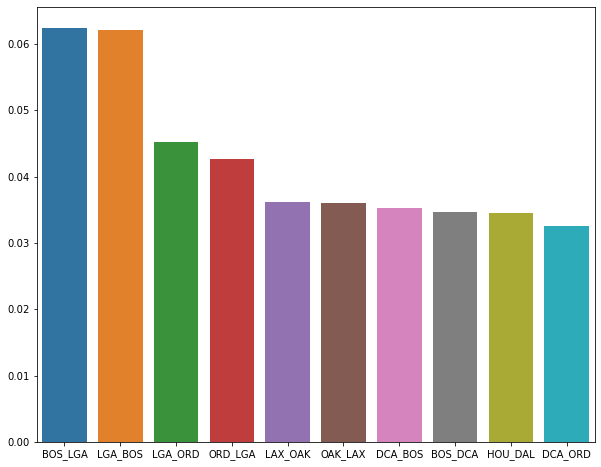

In [45]:
plt.figure(figsize=(10,8))
sns.barplot(x=popular_routes_['ROUTE'].to_numpy()[:10],y=popular_routes_['count/cancel'].to_numpy()[:10])

passengers who require flights in routes with high probability of cancellation from airlines might want to take flights going through other routes, cancellation could be due to multiple factors, weather conditions, insecurity, fuel wasted going through that distance compared to income the airline will make from the flight, either way, boarding a flight going through the straight path in these high prob routes will be risky for passengers who want to avoid cancellation

In [ ]:
route_cancellation = data_1.groupby()

In [93]:
#categorical_cols.remove('TAIL_NUMBER')
# categorical_cols.remove('CANCELLATION_REASON')
categorical_cols

['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

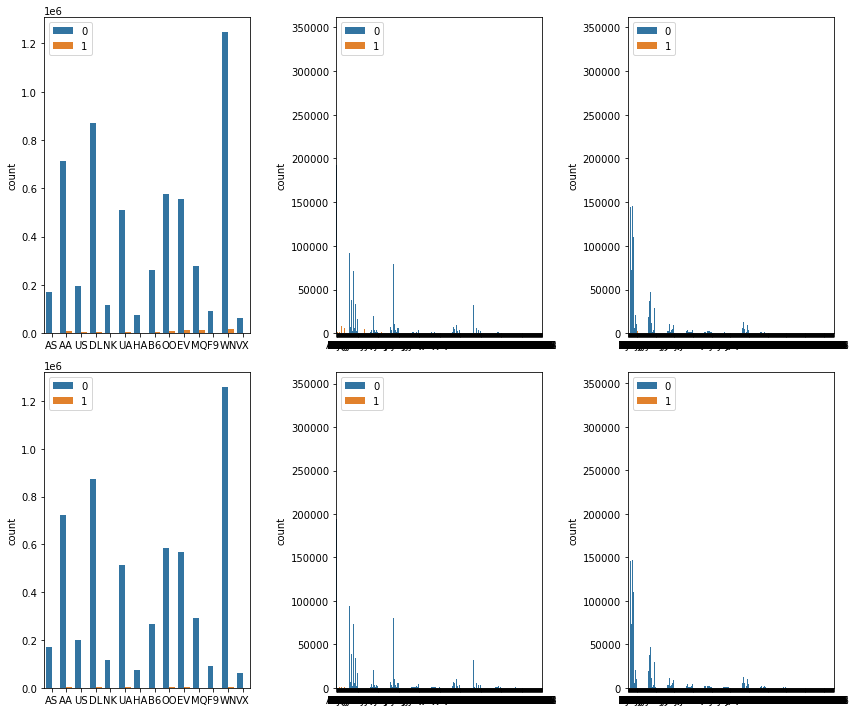

In [96]:
fig,ax = plt.subplots(2,3,figsize=(12,10))

sns.countplot(x=data_['AIRLINE'].to_numpy(),hue=data_['CANCELLED'].to_numpy(),ax=ax[0,0])
sns.countplot(x=data_['AIRLINE'].to_numpy(),hue=data_['DIVERTED'].to_numpy(),ax=ax[1,0])

sns.countplot(x=data_['ORIGIN_AIRPORT'].to_numpy(),hue=data_['CANCELLED'].to_numpy(),ax=ax[0,1])
sns.countplot(x=data_['ORIGIN_AIRPORT'].to_numpy(),hue=data_['DIVERTED'].to_numpy(),ax=ax[1,1])

sns.countplot(x=data_['DESTINATION_AIRPORT'].to_numpy(),hue=data_['CANCELLED'].to_numpy(),ax=ax[0,2])
sns.countplot(x=data_['DESTINATION_AIRPORT'].to_numpy(),hue=data_['DIVERTED'].to_numpy(),ax=ax[1,2])

plt.tight_layout()

In [138]:
data_1.groupby('CANCELLED').agg(pl.col('DISTANCE').median())

CANCELLED,DISTANCE
i64,f64
0,650.0
1,532.5


<AxesSubplot:>

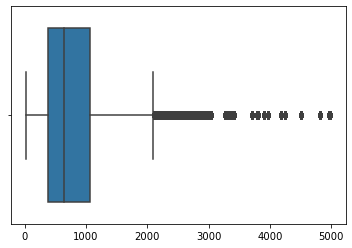

In [142]:
sns.boxplot(data_1['DISTANCE'].to_numpy())

KeyboardInterrupt: 

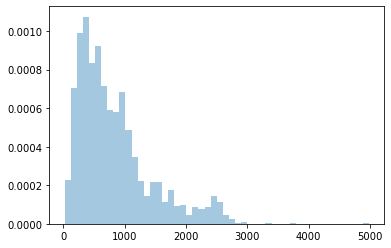

In [144]:
sns.distplot(data_1['DISTANCE'].to_numpy())

some outliers exist in DISTANCE column

In [18]:
data_2 = data_1.with_columns(z_score_distance = (pl.col('DISTANCE') - pl.col('DISTANCE').mean())/pl.col('DISTANCE').std())
data_2

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Date,ROUTE,z_score_distance
i64,i64,i64,i64,str,i64,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,str,str,str,str,f64,f64,date,str,f64
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""","""00""","""23""",-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null,"""Ted Stevens An…","""Anchorage""","""AK""","""USA""",61.17432,-149.99619,2015-01-01,"""ANC_SEA""",1.029384
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""","""00""","""00""",-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_PBI""",2.480557
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""","""00""","""00""",-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_CLT""",2.424616
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""","""00""","""00""",-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_MIA""",2.500301
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""","""00""","""00""",-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null,"""Seattle-Tacoma…","""Seattle""","""WA""","""USA""",47.44898,-122.30931,2015-01-01,"""SEA_ANC""",1.029384
2015,1,1,4,"""DL""",806,"""N3730B""","""SFO""","""MSP""","""00""","""00""",-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,null,null,null,null,null,null,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_MSP""",1.261374
2015,1,1,4,"""NK""",612,"""N635NK""","""LAS""","""MSP""","""00""","""00""",-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,null,null,null,null,null,null,"""McCarran Inter…","""Las Vegas""","""NV""","""USA""",36.08036,-115.15233,2015-01-01,"""LAS_MSP""",0.784231
2015,1,1,4,"""US""",2013,"""N584UW""","""LAX""","""CLT""","""00""","""00""",14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,null,null,null,null,null,null,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_CLT""",2.143266
2015,1,1,4,"""AA""",1112,"""N3LAAA""","""SFO""","""DFW""","""00""","""00""",-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,null,null,null,null,null,null,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_DFW""",1.055709


In [158]:
data_dist_z = data_2.filter((pl.col('z_score_distance')>3.4) | (pl.col('z_score_distance')<-3))
data_dist_z.groupby('CANCELLED').agg(pl.count())

CANCELLED,count
i64,u32
1,129
0,13366


In [151]:
data_dist_z = data_2.filter(pl.col('z_score_distance')<2.5)
data_dist_z.groupby('CANCELLED').agg(pl.count())

CANCELLED,count
i64,u32
0,5489664
1,87788


In [22]:
data_2.filter((pl.col('z_score_distance')<3)).select(pl.count('z_score_distance'))

z_score_distance
u32
5781737


In [23]:
data_2.filter((pl.col('z_score_distance')>=3)).select(pl.count('z_score_distance'))

z_score_distance
u32
37342


In [152]:
likelihood_of_cancellation = (129/13366, 87788/5489664)
likelihood_of_cancellation

(0.009651354182253479, 0.015991506948330535)

shorter trips have a greater probability of cancellation, this could be due to the fact they might not be generating enough revenue and greater traffic for shorter trips

In [240]:
data_2.groupby('CITY').agg((pl.col('CANCELLED').sum()/pl.count('CITY')).alias('count/cancelled'),pl.count("CITY").alias('count')).sort(by='count/cancelled',descending=True).drop_nulls()

CITY,count/cancelled,count
str,f64,u32
"""Ithaca""",0.117647,34
"""Mammoth Lakes""",0.102564,156
"""Hailey""",0.09205,956
"""Devils Lake""",0.087619,525
"""Crescent City""",0.084211,190
"""Aspen""",0.077485,3562
"""Muskegon""",0.073463,667
"""Adak""",0.072917,96
"""Jamestown""",0.07266,812


flights from/to Ithaca are cancelled the most, there is also low traffic of flights from/to there

In [227]:
data_2.groupby(['AIRPORT','CITY']).agg().filter(pl.col('CITY')=='Ithaca')

AIRPORT,CITY
str,str
"""Ithaca Tompkin…","""Ithaca"""


From here we see there is only 1 airport in Ithaca, which makes sense

In [197]:
data_2.groupby(['AIRPORT','CITY']).agg(pl.col("CITY").count().alias('count')).sort(by='count',descending=True).filter(pl.col('CITY')=='Atlanta')

AIRPORT,CITY,count
str,str,u32
"""Hartsfield-Jac…","""Atlanta""",346836


In [202]:
data_2.groupby(['CITY','STATE','AIRPORT']).agg(pl.col("CANCELLED").sum()).sort(by='CANCELLED',descending=True)#.filter(pl.col('STATE')=='GA')

CITY,STATE,AIRPORT,CANCELLED
str,str,str,i64
"""Chicago""","""IL""","""Chicago O'Hare…",8548
"""Dallas-Fort Wo…","""TX""","""Dallas/Fort Wo…",6254
"""New York""","""NY""","""LaGuardia Airp…",4531
"""Newark""","""NJ""","""Newark Liberty…",3110
"""Boston""","""MA""","""Gen. Edward La…",2654
"""Atlanta""","""GA""","""Hartsfield-Jac…",2557
null,null,null,2454
"""Los Angeles""","""CA""","""Los Angeles In…",2164
"""San Francisco""","""CA""","""San Francisco …",2148


In [244]:
data_2.groupby(['STATE']).agg((pl.col("CANCELLED").sum()/pl.col('STATE').count()).alias('state/cancelled'),pl.count('STATE').alias('count')).sort(by='state/cancelled',descending=True).drop_nulls()#.filter(pl.col('STATE')=='GA')

STATE,state/cancelled,count
str,f64,u32
"""DE""",0.05,100
"""IA""",0.034576,17382
"""NY""",0.031287,246235
"""AR""",0.030061,22654
"""VT""",0.029886,2978
"""NJ""",0.029591,108174
"""IL""",0.029072,381644
"""ME""",0.027937,5047
"""KS""",0.027631,10966


In [256]:
data_2.groupby(['CITY','STATE','AIRPORT']).agg(pl.col("CANCELLED").sum()).sort(by='CANCELLED',descending=True).filter(pl.col('STATE')=="NJ")

CITY,STATE,AIRPORT,CANCELLED
str,str,str,i64
"""Newark""","""NJ""","""Newark Liberty…",3110
"""Trenton""","""NJ""","""Trenton Mercer…",51
"""Atlantic City""","""NJ""","""Atlantic City …",40


With these few analysis we get two insights: states with high traffic of application for flights and few airports have more a number of cancelled flights, although this is found to not be the total causative factor as certain states such as NY(New York) which have good number of airports compared to others, still have high cancellation probability, although the number of traffic there is also high, it is believed the cancellation could be due to other factors

In [272]:
data_2.groupby(['STATE','AIRPORT']).agg((pl.count("STATE").alias('count'))).sort(by='count',descending=True)#.filter(pl.col('STATE')=="GA")

STATE,AIRPORT,count
str,str,u32
"""GA""","""Hartsfield-Jac…",346836
"""IL""","""Chicago O'Hare…",285884
"""TX""","""Dallas/Fort Wo…",239551
"""CO""","""Denver Interna…",196055
"""CA""","""Los Angeles In…",194673
"""CA""","""San Francisco …",148008
"""AZ""","""Phoenix Sky Ha…",146815
"""TX""","""George Bush In…",146622
"""NV""","""McCarran Inter…",133181


In [210]:
data_2.groupby(['STATE']).agg(pl.col("DIVERTED").sum()).sort(by='DIVERTED',descending=True)#.filter(pl.col('STATE')=='GA')

STATE,DIVERTED
str,i64
"""TX""",1780
"""CA""",1480
"""FL""",1379
"""IL""",1070
null,833
"""GA""",803
"""NY""",615
"""CO""",609
"""AZ""",402


States that have high demand and low number of airports have more flights diverted

In [213]:
data_2.groupby(['DIVERTED']).agg(pl.col("CANCELLED").sum())#.sort(by='DIVERTED',descending=True)#.filter(pl.col('STATE')=='GA')

DIVERTED,CANCELLED
i64,i64
1,0
0,89884


In [284]:
data_2.groupby(['STATE']).agg((pl.col("WEATHER_DELAY").sum()/pl.count('STATE')).alias('prob')).sort(by='prob',descending=True)#.filter(pl.col('STATE')=='GA')

STATE,prob
str,f64
null,inf
"""IL""",1.292147
"""WV""",1.078826
"""AR""",0.971528
"""IA""",0.966977
"""GA""",0.878687
"""OK""",0.847194
"""KS""",0.80932
"""TX""",0.770099


In [135]:
AIR_SYSTEM_DELAY	SECURITY_DELAY	AIRLINE_DELAY	LATE_AIRCRAFT_DELAY

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [217]:
data_2.groupby(['STATE']).agg(pl.col("LATE_AIRCRAFT_DELAY").sum()).sort(by='LATE_AIRCRAFT_DELAY',descending=True)#.filter(pl.col('STATE')=='GA')

STATE,LATE_AIRCRAFT_DELAY
str,i64
"""CA""",3291856
"""TX""",2894787
"""FL""",2039472
"""IL""",2016978
"""NY""",1328001
null,1194257
"""CO""",1127959
"""GA""",1114220
"""NV""",754322


Here we get another causative factor: Bad weather conditions are also a factor for cancellation in these areas, we also see that NY(New York) is one of the states which have cancelled flights due to weather conditions, as stated before the cancellation of flights was not univariate

## Time Series Analysis 

In [286]:
data_time = data_2
data_time

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Date,ROUTE,z_score_distance
i64,i64,i64,i64,str,i64,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,str,str,str,str,f64,f64,date,str,f64
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""","""00:05""","""23:54""",-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,"""0""",0,0,0,0,0,"""Ted Stevens An…","""Anchorage""","""AK""","""USA""",61.17432,-149.99619,2015-01-01,"""ANC_SEA""",1.029384
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""","""00:10""","""00:02""",-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,"""0""",0,0,0,0,0,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_PBI""",2.480557
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""","""00:20""","""00:18""",-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,"""0""",0,0,0,0,0,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_CLT""",2.424616
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""","""00:20""","""00:15""",-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,"""0""",0,0,0,0,0,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_MIA""",2.500301
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""","""00:25""","""00:24""",-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,"""0""",0,0,0,0,0,"""Seattle-Tacoma…","""Seattle""","""WA""","""USA""",47.44898,-122.30931,2015-01-01,"""SEA_ANC""",1.029384
2015,1,1,4,"""DL""",806,"""N3730B""","""SFO""","""MSP""","""00:25""","""00:20""",-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,"""0""",0,0,0,0,0,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_MSP""",1.261374
2015,1,1,4,"""NK""",612,"""N635NK""","""LAS""","""MSP""","""00:25""","""00:19""",-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,"""0""",0,0,0,0,0,"""McCarran Inter…","""Las Vegas""","""NV""","""USA""",36.08036,-115.15233,2015-01-01,"""LAS_MSP""",0.784231
2015,1,1,4,"""US""",2013,"""N584UW""","""LAX""","""CLT""","""00:30""","""00:44""",14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,"""0""",0,0,0,0,0,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_CLT""",2.143266
2015,1,1,4,"""AA""",1112,"""N3LAAA""","""SFO""","""DFW""","""00:30""","""00:19""",-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,"""0""",0,0,0,0,0,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_DFW""",1.055709


In [291]:
data_plot = data_time[['Date','CANCELLED']].to_pandas()
data_plot.set_index('Date',inplace=True)
data_plot

,CANCELLED
Date,
2015-01-01,0
2015-01-01,0
2015-01-01,0
2015-01-01,0
2015-01-01,0
...,...
2015-12-31,0
2015-12-31,0
2015-12-31,0


<AxesSubplot:xlabel='Date'>

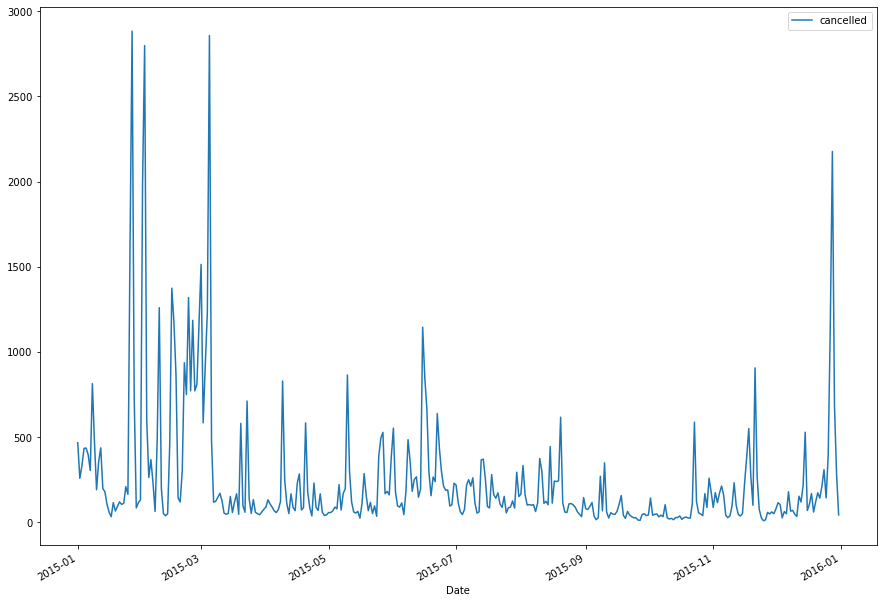

In [406]:
data_plot = data_time.groupby(['Date']).agg(pl.col('CANCELLED').sum().alias('cancelled')).to_pandas().set_index('Date')
data_plot.plot(figsize=(15,11))

Flights in the first quarter of the year are cancelled the most, these could be due to weather conditions as discovered before and also high number of flight applications during these periods

In [425]:
data_time =data_time.with_columns(SCHEDULED_DEPARTURE = result_df['SCHEDULED_DEPARTURE'])
data_time

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Date,ROUTE,z_score_distance
i64,i64,i64,i64,str,i64,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,str,str,str,str,f64,f64,date,str,f64
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""","""00""","""23:54""",-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,"""0""",0,0,0,0,0,"""Ted Stevens An…","""Anchorage""","""AK""","""USA""",61.17432,-149.99619,2015-01-01,"""ANC_SEA""",1.029384
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""","""00""","""00:02""",-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,"""0""",0,0,0,0,0,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_PBI""",2.480557
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""","""00""","""00:18""",-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,"""0""",0,0,0,0,0,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_CLT""",2.424616
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""","""00""","""00:15""",-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,"""0""",0,0,0,0,0,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_MIA""",2.500301
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""","""00""","""00:24""",-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,"""0""",0,0,0,0,0,"""Seattle-Tacoma…","""Seattle""","""WA""","""USA""",47.44898,-122.30931,2015-01-01,"""SEA_ANC""",1.029384
2015,1,1,4,"""DL""",806,"""N3730B""","""SFO""","""MSP""","""00""","""00:20""",-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,"""0""",0,0,0,0,0,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_MSP""",1.261374
2015,1,1,4,"""NK""",612,"""N635NK""","""LAS""","""MSP""","""00""","""00:19""",-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,"""0""",0,0,0,0,0,"""McCarran Inter…","""Las Vegas""","""NV""","""USA""",36.08036,-115.15233,2015-01-01,"""LAS_MSP""",0.784231
2015,1,1,4,"""US""",2013,"""N584UW""","""LAX""","""CLT""","""00""","""00:44""",14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,"""0""",0,0,0,0,0,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_CLT""",2.143266
2015,1,1,4,"""AA""",1112,"""N3LAAA""","""SFO""","""DFW""","""00""","""00:19""",-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,"""0""",0,0,0,0,0,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_DFW""",1.055709


In [ ]:
data_time = data_time.with_columns(SCHEDULED_DEPARTURE=pl.col('SCHEDULED_DEPARTURE').cast(pl.Int64))
data_time

In [429]:
# date_plot1 = data_time.with_columns(pl.col('SCHEDULED_DEPARTURE').str.to_time('%H:%M',strict=False))[['SCHEDULED_DEPARTURE','CANCELLED']]
# date_plot1

date_plot1 = data_time

In [430]:
date_plot1_= date_plot1.groupby('SCHEDULED_DEPARTURE').agg(pl.col('CANCELLED').sum().alias('cancel')).sort(by='cancel',descending=True).to_pandas()#.set_index('SCHEDULED_DEPARTURE')

In [431]:
date_plot1_

,SCHEDULED_DEPARTURE,cancel
0,17,6786
1,18,6497
2,19,6129
3,16,5638
4,15,5273
5,20,5270
6,14,4848
7,12,4784
8,10,4762
9,13,4750


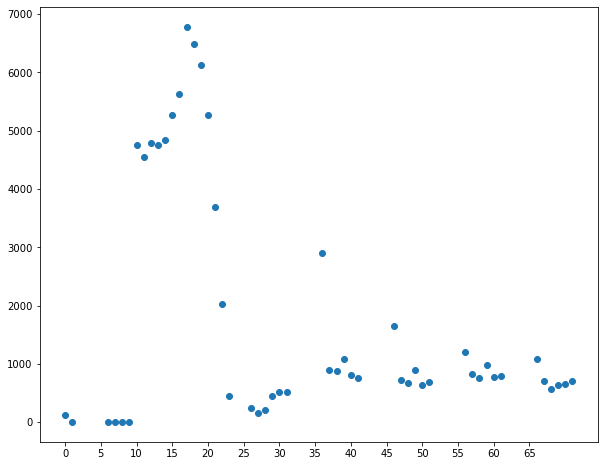

In [437]:
plt.figure(figsize=(10,8))
plt.scatter(x=date_plot1_['SCHEDULED_DEPARTURE'],y=date_plot1_['cancel'])
plt.xticks(np.arange(0,70,5))
plt.show()

scheduled flights at times in late afternoon to late evenings had higher number of cancellations

<AxesSubplot:title={'center':'Time Plot without Date'}, xlabel='Time', ylabel='cancelled'>

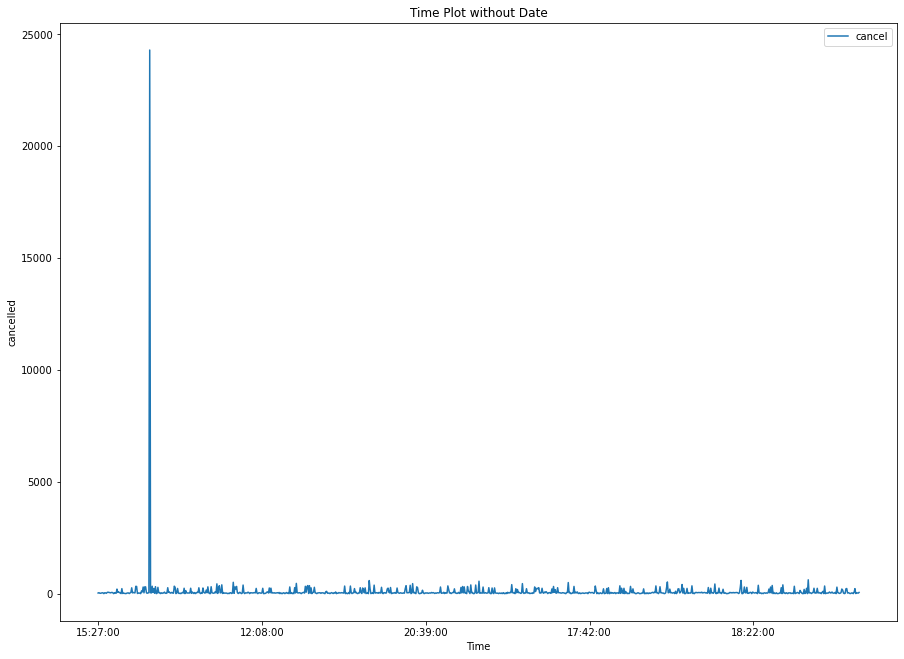

In [357]:
# Plot the time column using hvplot
date_plot1_.plot(xlabel='Time', ylabel='cancelled', title='Time Plot without Date',figsize=(15,11))

In [365]:
date_plot1_['SCHEDULED_DEPARTURE']

0      23:00:00
1      13:48:00
2      11:17:00
3      11:53:00
4      15:15:00
         ...   
925    10:55:00
926    19:25:00
927    00:09:00
928    16:12:00
929    14:41:00
Name: SCHEDULED_DEPARTURE, Length: 930, dtype: object

In [375]:
date_plot1_.dropna(inplace=True)

In [376]:
from datetime import datetime, date, time

# Assuming today's date for the example
today_date = date.today()

# Assuming date_plot1_ is your DataFrame with a column 'SCHEDULED_DEPARTURE'
date_plot1_['SCHEDULED_DEPARTURE'] = date_plot1_['SCHEDULED_DEPARTURE'].apply(lambda x: datetime.combine(today_date, x))

# Now 'SCHEDULED_DEPARTURE' column is converted to datetime format


In [381]:
date_plot2  = date_plot1_.set_index('SCHEDULED_DEPARTURE')
date_plot2

,cancel
SCHEDULED_DEPARTURE,
2024-01-12 23:00:00,41
2024-01-12 13:48:00,34
2024-01-12 11:17:00,20
2024-01-12 11:53:00,21
2024-01-12 15:15:00,231
...,...
2024-01-12 10:55:00,240
2024-01-12 19:25:00,273
2024-01-12 00:09:00,0


<AxesSubplot:xlabel='SCHEDULED_DEPARTURE'>

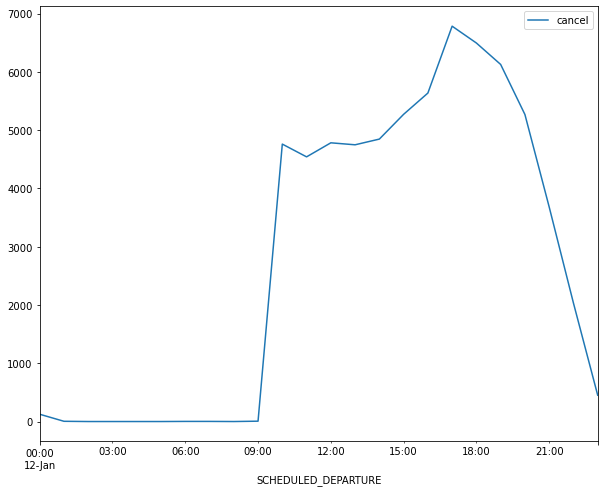

In [407]:
date_plot2.resample('H').sum().plot(figsize=(10,8))

As noted before flights during hours from afternoon to late evenings have higher recorded number of cancellations, these could be due to the high traffic of flights in that period, airline operators might want to make available more planes and staffs during these periods to reduce the number

In [ ]:
df.select(pl.col('SCHEDULED_DEPARTURE').cast(pl.String).apply(lambda x: 4-len(x)))

In [303]:
flight_df_.select(pl.col(TIME_COLUMNS).map_elements(lambda x: time_casting(x,))

SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,0,0,0
10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,0,0,0
20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,0,0,0
20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,0,0,0
25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,0,0,0
25,20,-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,0,0,0
25,19,-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,0,0,0
30,44,14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,0,0,0
30,19,-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,0,0,0


In [444]:
data_2 = data_2.with_columns(airtimeH = pl.col('AIR_TIME')/60)
data_2

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Date,ROUTE,z_score_distance,airtimeH
i64,i64,i64,i64,str,i64,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,str,str,str,str,f64,f64,date,str,f64,f64
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""","""00:05""","""23:54""",-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,"""0""",0,0,0,0,0,"""Ted Stevens An…","""Anchorage""","""AK""","""USA""",61.17432,-149.99619,2015-01-01,"""ANC_SEA""",1.029384,2.816667
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""","""00:10""","""00:02""",-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,"""0""",0,0,0,0,0,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_PBI""",2.480557,4.383333
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""","""00:20""","""00:18""",-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,"""0""",0,0,0,0,0,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_CLT""",2.424616,4.433333
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""","""00:20""","""00:15""",-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,"""0""",0,0,0,0,0,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_MIA""",2.500301,4.3
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""","""00:25""","""00:24""",-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,"""0""",0,0,0,0,0,"""Seattle-Tacoma…","""Seattle""","""WA""","""USA""",47.44898,-122.30931,2015-01-01,"""SEA_ANC""",1.029384,3.316667
2015,1,1,4,"""DL""",806,"""N3730B""","""SFO""","""MSP""","""00:25""","""00:20""",-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,"""0""",0,0,0,0,0,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_MSP""",1.261374,3.433333
2015,1,1,4,"""NK""",612,"""N635NK""","""LAS""","""MSP""","""00:25""","""00:19""",-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,"""0""",0,0,0,0,0,"""McCarran Inter…","""Las Vegas""","""NV""","""USA""",36.08036,-115.15233,2015-01-01,"""LAS_MSP""",0.784231,2.566667
2015,1,1,4,"""US""",2013,"""N584UW""","""LAX""","""CLT""","""00:30""","""00:44""",14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,"""0""",0,0,0,0,0,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_CLT""",2.143266,3.8
2015,1,1,4,"""AA""",1112,"""N3LAAA""","""SFO""","""DFW""","""00:30""","""00:19""",-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,"""0""",0,0,0,0,0,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_DFW""",1.055709,2.883333


In [445]:
data_3 = data_2.with_columns(speedkmh = pl.col('DISTANCE')/pl.col('airtimeH'))
data_3

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Date,ROUTE,z_score_distance,airtimeH,speedkmh
i64,i64,i64,i64,str,i64,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,str,str,str,str,f64,f64,date,str,f64,f64,f64
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""","""00:05""","""23:54""",-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,"""0""",0,0,0,0,0,"""Ted Stevens An…","""Anchorage""","""AK""","""USA""",61.17432,-149.99619,2015-01-01,"""ANC_SEA""",1.029384,2.816667,514.08284
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""","""00:10""","""00:02""",-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,"""0""",0,0,0,0,0,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_PBI""",2.480557,4.383333,531.558935
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""","""00:20""","""00:18""",-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,"""0""",0,0,0,0,0,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_CLT""",2.424616,4.433333,517.894737
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""","""00:20""","""00:15""",-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,"""0""",0,0,0,0,0,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_MIA""",2.500301,4.3,544.651163
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""","""00:25""","""00:24""",-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,"""0""",0,0,0,0,0,"""Seattle-Tacoma…","""Seattle""","""WA""","""USA""",47.44898,-122.30931,2015-01-01,"""SEA_ANC""",1.029384,3.316667,436.582915
2015,1,1,4,"""DL""",806,"""N3730B""","""SFO""","""MSP""","""00:25""","""00:20""",-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,"""0""",0,0,0,0,0,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_MSP""",1.261374,3.433333,462.815534
2015,1,1,4,"""NK""",612,"""N635NK""","""LAS""","""MSP""","""00:25""","""00:19""",-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,"""0""",0,0,0,0,0,"""McCarran Inter…","""Las Vegas""","""NV""","""USA""",36.08036,-115.15233,2015-01-01,"""LAS_MSP""",0.784231,2.566667,506.103896
2015,1,1,4,"""US""",2013,"""N584UW""","""LAX""","""CLT""","""00:30""","""00:44""",14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,"""0""",0,0,0,0,0,"""Los Angeles In…","""Los Angeles""","""CA""","""USA""",33.94254,-118.40807,2015-01-01,"""LAX_CLT""",2.143266,3.8,559.210526
2015,1,1,4,"""AA""",1112,"""N3LAAA""","""SFO""","""DFW""","""00:30""","""00:19""",-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,"""0""",0,0,0,0,0,"""San Francisco …","""San Francisco""","""CA""","""USA""",37.619,-122.37484,2015-01-01,"""SFO_DFW""",1.055709,2.883333,507.745665
